In [1]:
from models import RedshiftSpace
import models as md
import pickle
import matplotlib.pyplot as plt
import numpy as np
import importlib
import seaborn as sns
from CentralStreamingModel.utils import plot_tools as pt
sns.set_context('talk')
import time

In [2]:
tracer = 'galaxies'
n_boxes = range(1,16)
boxsize = 2000
snapshot = 11

rs = []
for i, box in enumerate(n_boxes):
    rs.append(RedshiftSpace(box, boxsize, snapshot, tracer = tracer))

In [3]:
t1 = time.time()
mean_rs = md.MeanRedshiftSpace( boxsize, snapshot, rs)
print(f'It took {time.time() - t1} seconds.')

It took 44.21584630012512 seconds.


Text(0, 0.5, '$s_\\parallel$ [Mpc/h]')

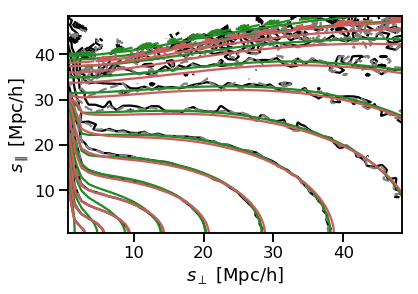

In [4]:
s_c = rs[0].measured.s_c
levels = np.arange(-4, 1, 0.3)


colors = [mean_rs.measured.color] * len(levels)
plt.contour(s_c, s_c, 
            np.log10(mean_rs.measured.pi_sigma.mean).T, 
            levels=levels, colors=colors)

colors = [mean_rs.streaming.color] * len(levels)
plt.contour(mean_rs.streaming.s_c, mean_rs.streaming.s_c,
            np.log10(mean_rs.streaming.pi_sigma).T,
           levels=levels, colors=colors, linestyles='dashed')

colors = [mean_rs.gaussian.color] * len(levels)

plt.contour(mean_rs.gaussian.s_c, mean_rs.gaussian.s_c,
            np.log10(mean_rs.gaussian.pi_sigma).T,
           levels=levels, colors=colors)


colors = [mean_rs.skewt.color] * len(levels)

plt.contour(mean_rs.skewt.s_c, mean_rs.skewt.s_c,
            np.log10(mean_rs.skewt.pi_sigma).T,
           levels=levels, colors=colors)

#plt.xlim(0,30)

#plt.ylim(0,30)

plt.xlabel('$s_\perp$ [Mpc/h]')
plt.ylabel('$s_\parallel$ [Mpc/h]')

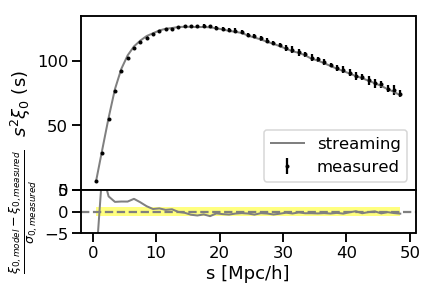

In [5]:
pt.plot_attribute_residual( mean_rs, ['streaming'],
                    'monopole',  r'$s^2\xi_0$ (s)', 
r'$\frac{\xi_{0,model} - \xi_{0, measured}}{\sigma_{0, measured}}$')


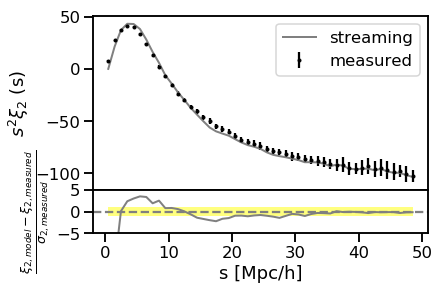

In [6]:
pt.plot_attribute_residual( mean_rs, ['streaming'],
                    'quadrupole', r'$s^2\xi_2$ (s)',
r'$\frac{\xi_{2,model} - \xi_{2, measured}}{\sigma_{2, measured}}$')

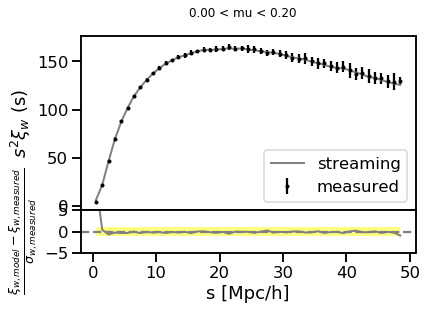

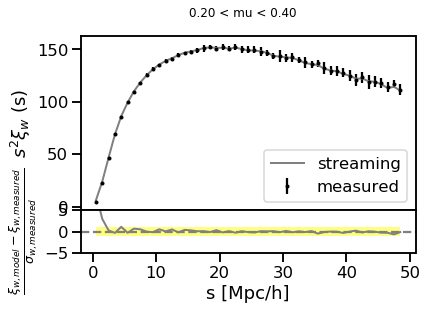

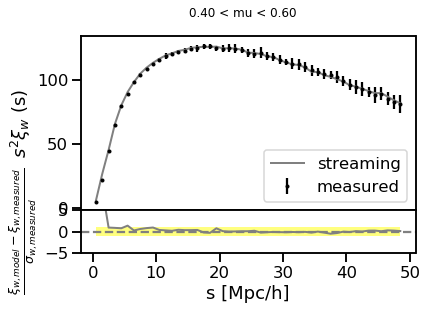

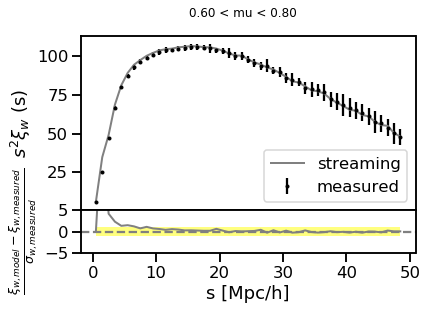

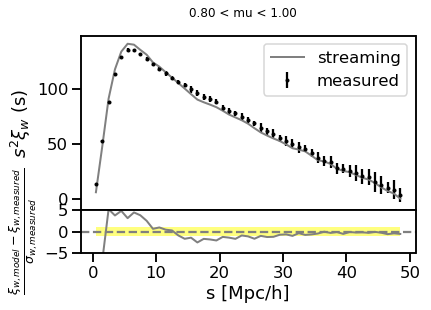

In [7]:
n_wedges = 5

for wedge in range(n_wedges):
    
    pt.plot_attribute_residual( mean_rs, ['streaming'],
                    f'wedge_{wedge}', r'$s^2\xi_w$ (s)',
        r'$\frac{\xi_{w,model} - \xi_{w, measured}}{\sigma_{w, measured}}$',
        title =f'{mean_rs.skewt.wedges_bins[wedge]:.2f} < mu < {mean_rs.skewt.wedges_bins[wedge+1]:.2f}' )
    plt.show()

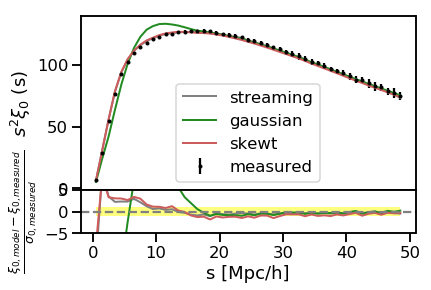

In [8]:
pt.plot_attribute_residual( mean_rs, ['streaming','gaussian', 'skewt'],
                    'monopole',  r'$s^2\xi_0$ (s)', 
r'$\frac{\xi_{0,model} - \xi_{0, measured}}{\sigma_{0, measured}}$')


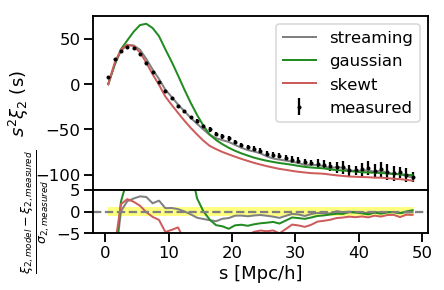

In [9]:
pt.plot_attribute_residual( mean_rs, ['streaming', 'gaussian', 'skewt'],
                    'quadrupole', r'$s^2\xi_2$ (s)',
r'$\frac{\xi_{2,model} - \xi_{2, measured}}{\sigma_{2, measured}}$')


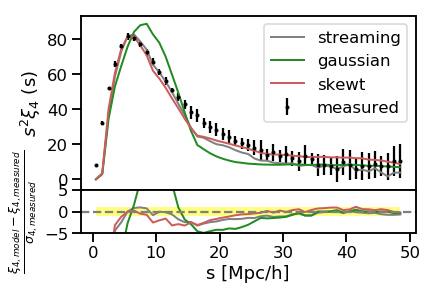

In [10]:
pt.plot_attribute_residual( mean_rs, ['streaming', 'gaussian', 'skewt'],
                    'hexadecapole', r'$s^2\xi_4$ (s)',
r'$\frac{\xi_{4,model} - \xi_{4, measured}}{\sigma_{4, measured}}$')


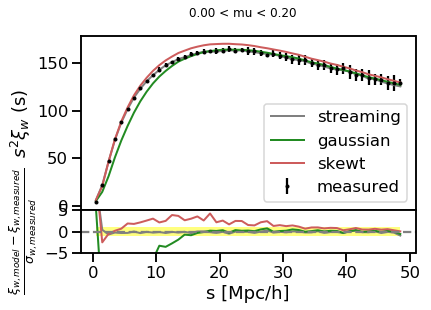

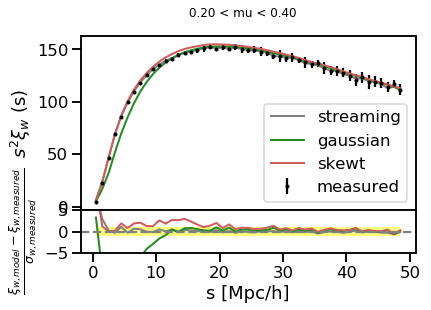

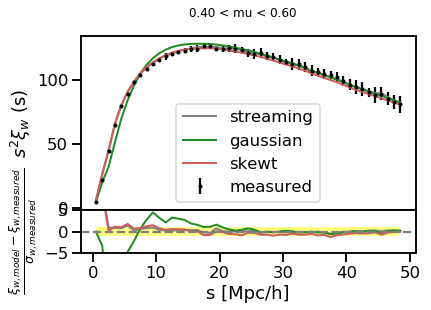

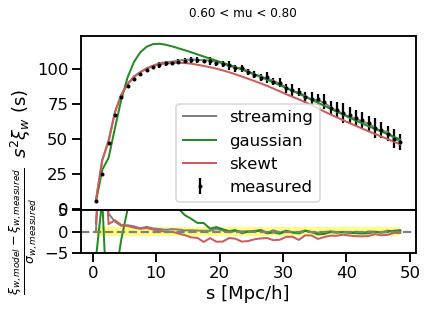

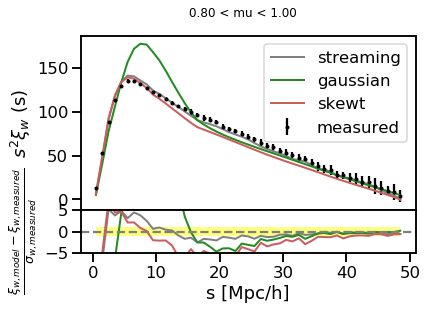

In [11]:
n_wedges = 5

for wedge in range(n_wedges):
    
    pt.plot_attribute_residual( mean_rs, ['streaming', 'gaussian', 'skewt'],
                    f'wedge_{wedge}', r'$s^2\xi_w$ (s)',
        r'$\frac{\xi_{w,model} - \xi_{w, measured}}{\sigma_{w, measured}}$',
        title =f'{mean_rs.skewt.wedges_bins[wedge]:.2f} < mu < {mean_rs.skewt.wedges_bins[wedge+1]:.2f}' )
    plt.show()

(-15, 25)

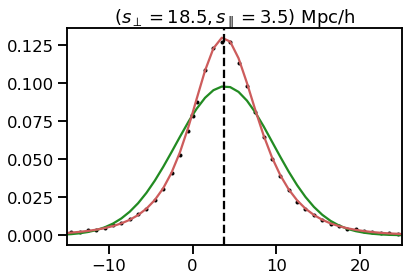

In [12]:
s = 19
mu = 0.2
rperp = int(s * (1 - mu**2))
rparal = int(s * mu)
plt.title(r'($ s_\perp = %.1f'
               ', s_\parallel = %.1f)$ Mpc/h'%(rs[0].measured.r_perp[rperp],
                                               rs[0].measured.r_parallel[rparal]))
plt.plot(mean_rs.streaming.int_r_parallel,
        mean_rs.streaming.integrand[rperp,rparal], 
        linestyle='', marker='o',
        markersize=3, color='k', label='Measured')

plt.plot(mean_rs.gaussian.int_r_parallel,
        mean_rs.gaussian.integrand[rperp,rparal], 
        linestyle='-',
            color= mean_rs.gaussian.color, label='Gaussian')

plt.plot(mean_rs.skewt.int_r_parallel,
        mean_rs.skewt.integrand[rperp,rparal], 
        linestyle='-',
            color= mean_rs.skewt.color, label='ST')

plt.axvline(x = s*mu, color='black', linestyle='--')

plt.xlim(-15, 25)

In [13]:
from scipy.integrate import simps

dr = mean_rs.skewt.int_r_parallel[-1] - mean_rs.skewt.int_r_parallel[-2]

r_left_bool = mean_rs.skewt.int_r_parallel < s*mu

streaming_first_half = simps(mean_rs.streaming.integrand[rperp,rparal][r_left_bool], dx = dr)

gaussian_first_half = simps(mean_rs.gaussian.integrand[rperp,rparal][r_left_bool], dx = dr)

skewt_first_half = simps(mean_rs.skewt.integrand[rperp,rparal][r_left_bool], dx = dr)

In [14]:
print(f'Gaussian {100*(gaussian_first_half - streaming_first_half)/streaming_first_half:.4f}')
print(f'Skewt {100*(skewt_first_half - streaming_first_half)/streaming_first_half:.4f}')


Gaussian 1.2403
Skewt 0.7165


In [15]:
r_right_bool = mean_rs.skewt.int_r_parallel >= s*mu

streaming_right_half = simps(mean_rs.streaming.integrand[rperp,rparal][r_right_bool], dx = dr)

gaussian_right_half = simps(mean_rs.gaussian.integrand[rperp,rparal][r_right_bool], dx=dr)

skewt_right_half = simps(mean_rs.skewt.integrand[rperp,rparal][r_right_bool], dx = dr)


In [16]:
print(f'Gaussian {100*(gaussian_right_half - streaming_right_half)/streaming_right_half:.4f}')
print(f'Skewt {100*(skewt_right_half - streaming_right_half)/streaming_right_half:.4f}')

Gaussian 3.3556
Skewt 1.8362


In [17]:
streaming_full = simps(mean_rs.streaming.integrand[rperp,rparal], dx = dr)
gaussian_full = simps(mean_rs.gaussian.integrand[rperp,rparal], dx = dr)

skewt_full = simps(mean_rs.skewt.integrand[rperp,rparal], dx = dr)

In [18]:
print(streaming_right_half + streaming_first_half)
print(streaming_full)
print(gaussian_full)
print(skewt_full)

1.47682400927
1.6043201986642022
1.6067377221438455
1.624520234936834


In [19]:
print(f'Gaussian {100*(gaussian_full - streaming_full)/streaming_full:.4f}')
print(f'Skewt {100*(skewt_full - streaming_full)/streaming_full:.4f}')

Gaussian 0.1507
Skewt 1.2591
